# Visão computacional em carros autônomos

Figura 1 | Kernel de convolução em ação - Fonte: elaborada pelo autor.

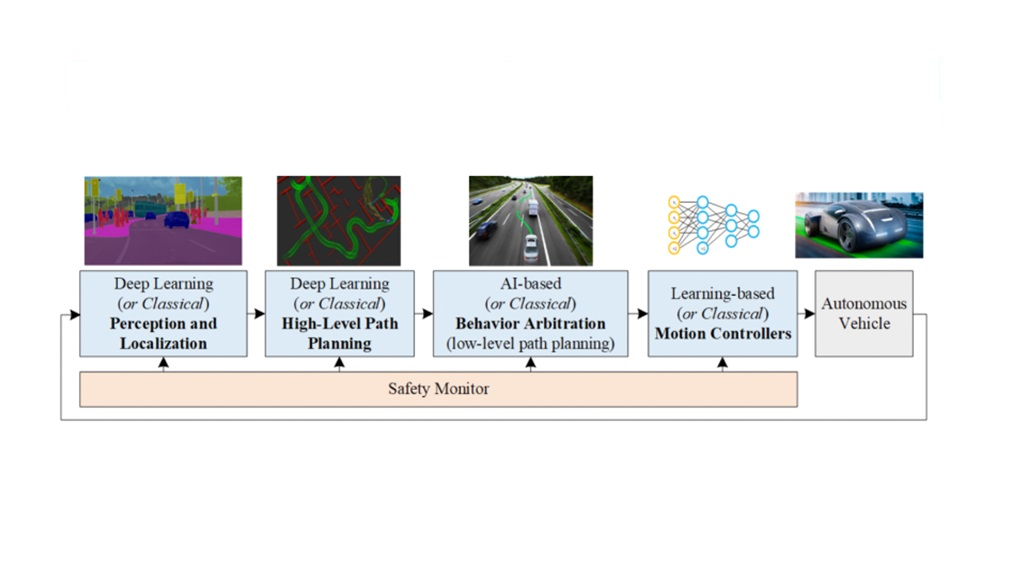

In [14]:
from PIL import Image

display(Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\Ciências de Dados - Anhanguera Ampli\Inteligência Artificial\Redes Neurais e Deep Learning\RNA_Deep_Learning\Unidade_III\Aula_IV\Figura1.png'))

Figura 2 | Visualização da posição e orientação de um veículo - Fonte: elaborada pelo autor.

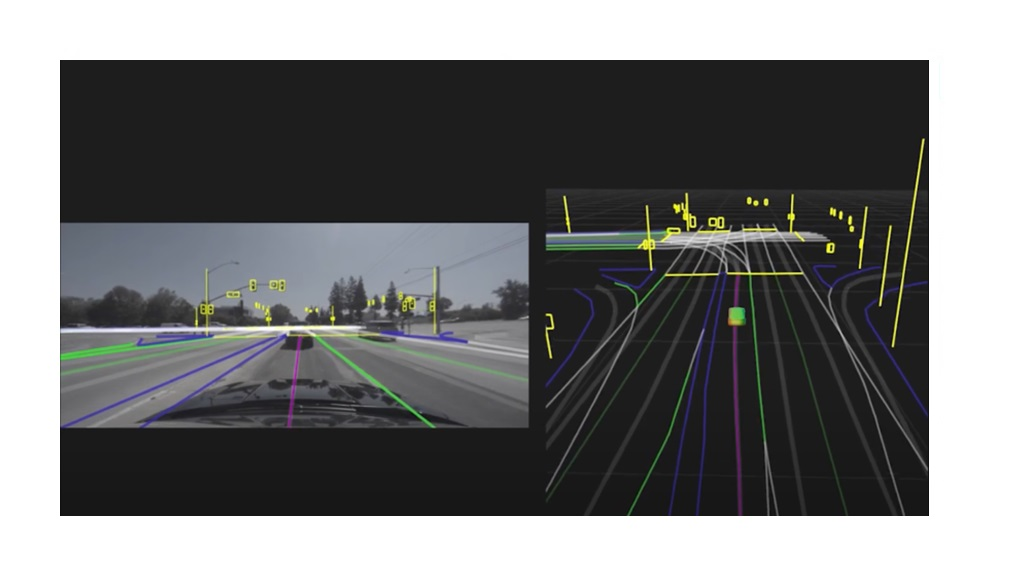

In [15]:
from PIL import Image

display(Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\Ciências de Dados - Anhanguera Ampli\Inteligência Artificial\Redes Neurais e Deep Learning\RNA_Deep_Learning\Unidade_III\Aula_IV\Figura2.png'))

Figura 3 | Detecção de objetos em movimentos pela visão computacional de um veículo autônomo - Fonte: elaborada pelo autor.

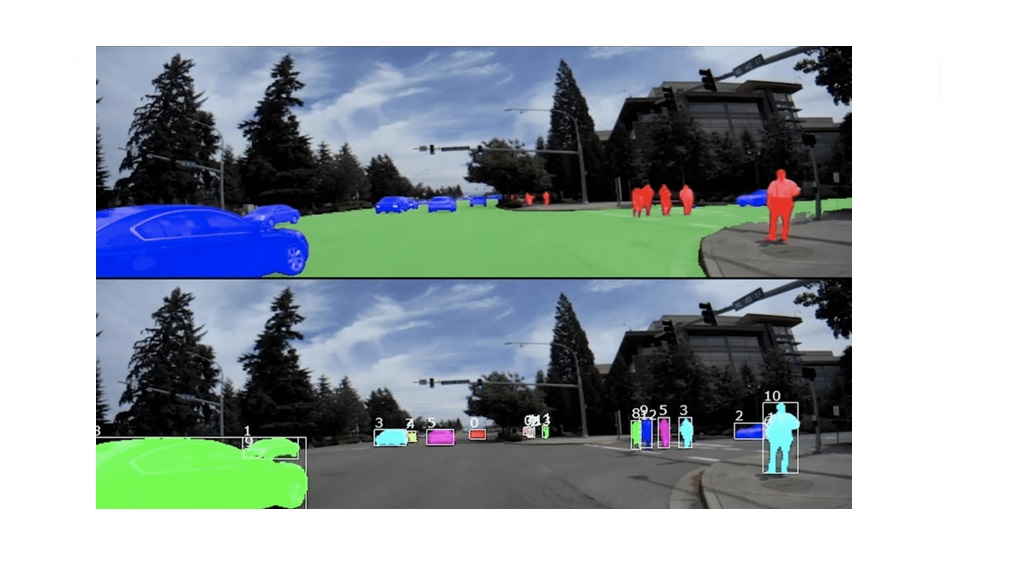

In [16]:
from PIL import Image

display(Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\Ciências de Dados - Anhanguera Ampli\Inteligência Artificial\Redes Neurais e Deep Learning\RNA_Deep_Learning\Unidade_III\Aula_IV\Figura3.png'))

Figura 4 | ConvNet para direção autônoma. Observe as camadas de conv e pooling capturando e filtrando a imagem, e as camadas totalmente conectadas onde ocorre o aprendizado - Fonte: elaborada pelo autor.

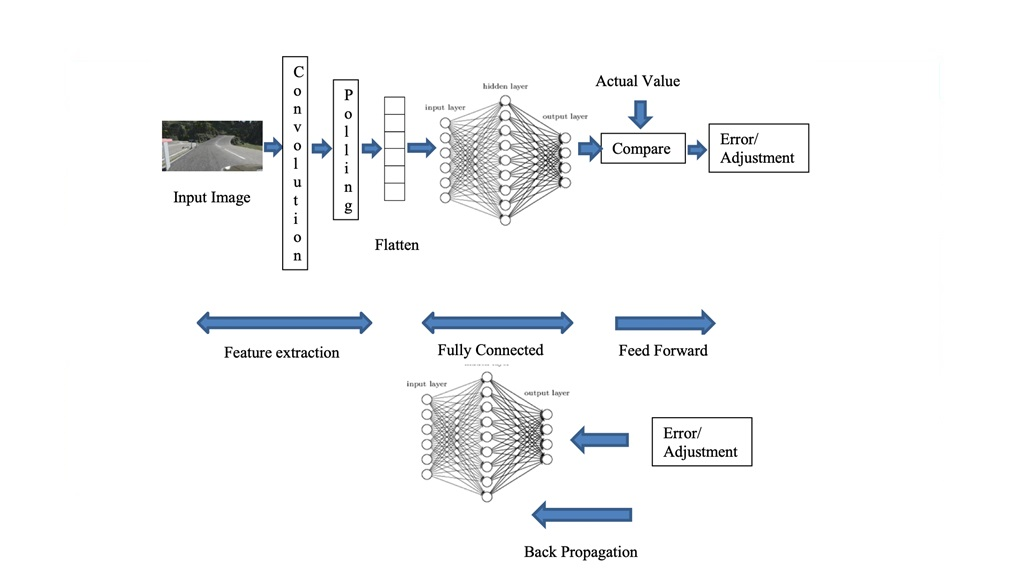

In [17]:
from PIL import Image

display(Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\Ciências de Dados - Anhanguera Ampli\Inteligência Artificial\Redes Neurais e Deep Learning\RNA_Deep_Learning\Unidade_III\Aula_IV\Figura4.png'))

# Processamento de áudio

Figura 5 | Arquitetura convolucional do Spotify - Fonte: Dieleman (2014).

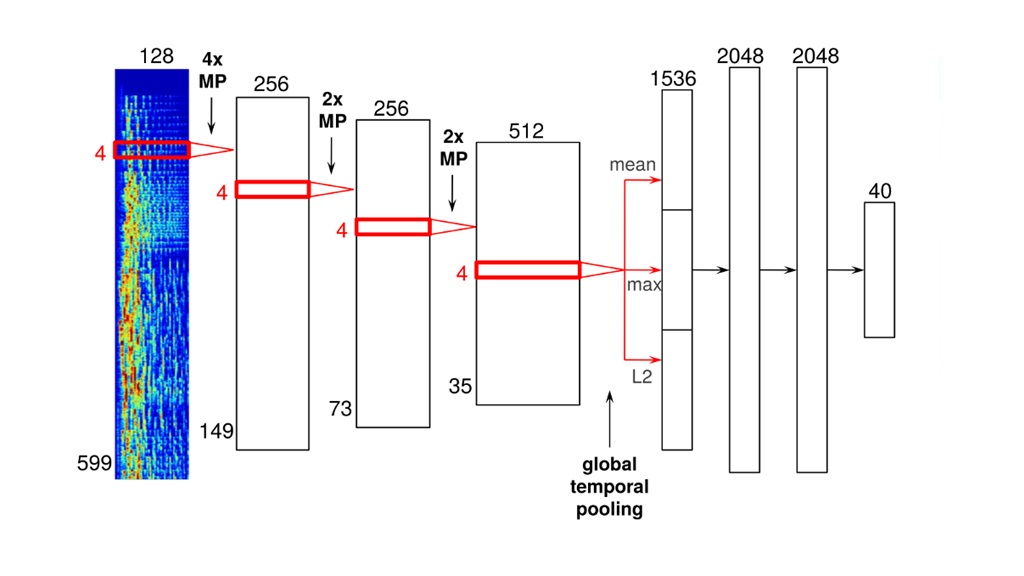

In [18]:
from PIL import Image

display(Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\Ciências de Dados - Anhanguera Ampli\Inteligência Artificial\Redes Neurais e Deep Learning\RNA_Deep_Learning\Unidade_III\Aula_IV\Figura5.png'))

Figura 6 | Um espectrograma é como uma impressão digital individual de um áudio - Fonte: Marius (2021).

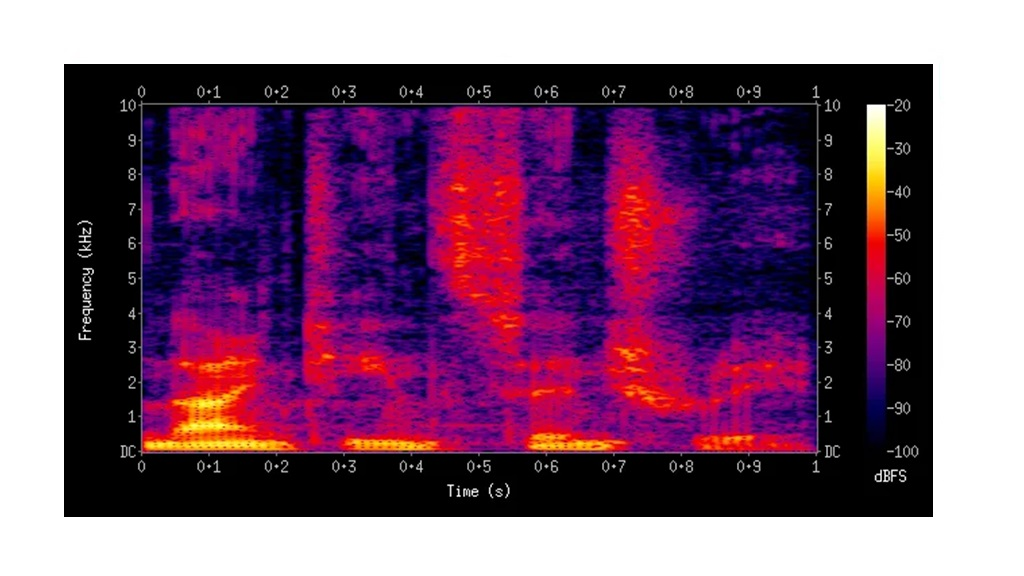

In [19]:
from PIL import Image

display(Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\Ciências de Dados - Anhanguera Ampli\Inteligência Artificial\Redes Neurais e Deep Learning\RNA_Deep_Learning\Unidade_III\Aula_IV\Figura6.png'))

# Hands-on com ConvNet

Figura 14 | Camadas e processos de uma ConvNet para diagnóstico médico - Fonte: elaborada pelo autor.

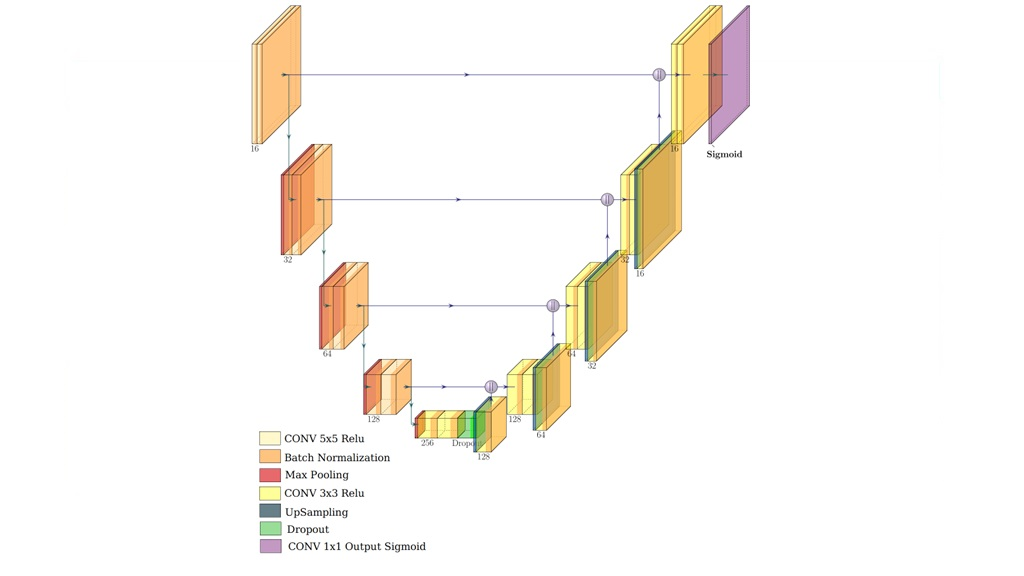

In [20]:
from PIL import Image

display(Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\Ciências de Dados - Anhanguera Ampli\Inteligência Artificial\Redes Neurais e Deep Learning\RNA_Deep_Learning\Unidade_III\Aula_IV\Figura14.png'))

> O objetivo do nosso hands-on é desenvolver uma rede convolucional para segmentar imagens de câncer de mama automaticamente.
> 
> Os dados utilizados serão imagens de mamografias provenientes do banco de dados "CBIS-DDSM", disponível no site "The Cancer Image Archive".
> 
> Observe o pipeline para detecção automática de câncer de mama em mamografias e, na sequência (Figura 10), o script que importa as bibliotecas necessárias, faz uma leitura prévia do dataset contendo as imagens de mamografias divididas para treino e teste, obtém o gráfico contendo os tipos de tumores, uma amostra em formato dataframe dos dados e faz a contagem dos exemplos por tipo de tumores.

In [21]:
!pip install pydicom

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import pydicom as dicom
import requests
import zipfile
import os
import numpy as np


In [23]:
df_train = pd.read_csv('https://www.cancerimagingarchive.net/wp-content/uploads/mass_case_description_train_set.csv')

In [24]:
df_test = pd.read_csv('https://www.cancerimagingarchive.net/wp-content/uploads/mass_case_description_test_set.csv')

In [25]:
df_train.head(10)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
5,P_00009,3,RIGHT,CC,1,mass,OVAL,ILL_DEFINED,4,MALIGNANT,4,Mass-Training_P_00009_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_00009_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_00009_RIGHT_CC_1/1.3.6.1.4.1.9...
6,P_00009,3,RIGHT,MLO,1,mass,OVAL,ILL_DEFINED,4,MALIGNANT,4,Mass-Training_P_00009_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00009_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00009_RIGHT_MLO_1/1.3.6.1.4.1....
7,P_00015,3,LEFT,MLO,1,mass,IRREGULAR,ILL_DEFINED-SPICULATED,4,MALIGNANT,4,Mass-Training_P_00015_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00015_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00015_LEFT_MLO_1/1.3.6.1.4.1.9...
8,P_00018,2,RIGHT,CC,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00018_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_00018_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_00018_RIGHT_CC_1/1.3.6.1.4.1.9...
9,P_00018,2,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00018_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00018_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00018_RIGHT_MLO_1/1.3.6.1.4.1....


In [26]:
df_test.head(10)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....
5,P_00032,3,RIGHT,MLO,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Mass-Test_P_00032_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Mass-Test_P_00032_RIGHT_MLO_1/1.3.6.1.4.1.9590...
6,P_00037,3,RIGHT,CC,1,mass,ROUND,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00037_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00037_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00037_RIGHT_CC_1/1.3.6.1.4.1.9590....
7,P_00037,3,RIGHT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00037_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Mass-Test_P_00037_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Mass-Test_P_00037_RIGHT_MLO_1/1.3.6.1.4.1.9590...
8,P_00056,3,LEFT,MLO,1,mass,LOBULATED,CIRCUMSCRIBED,3,BENIGN,4,Mass-Test_P_00056_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00056_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00056_LEFT_MLO_1/1.3.6.1.4.1.9590....
9,P_00066,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,4,MALIGNANT,3,Mass-Test_P_00066_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00066_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00066_LEFT_CC_1/1.3.6.1.4.1.9590.1...


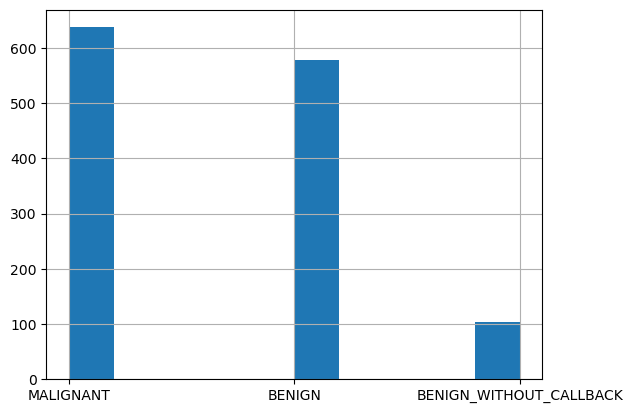

In [27]:
_=df_train['pathology'].hist()

In [28]:
sample = df_train.sample(1)

In [29]:
df_train['pathology'].value_counts(normalize=False)

pathology
MALIGNANT                  637
BENIGN                     577
BENIGN_WITHOUT_CALLBACK    104
Name: count, dtype: int64

> Na sequência, vamos extrair as imagens do dataset para atribuir um ID para cada imagem e plotar isso com o script a seguir.
> 
> Para isso, precisamos criar uma variável para o ID, acessar o link do banco, executar o request das imagens, salvar as imagens em zip, extrair o arquivo zipado e plotar a imagem.

In [30]:
fileImages = [sample['image file path'], sample['ROI mask file path']]
imgs = []

In [34]:
# Para cada imagem
for fileImage in fileImages:
    # ID da imagem
    seriesID = fileImage.values[0].split("/")[2]
    # URL
    url = 'https://services.cancerimagingarchive.net/services/v4/TCIA/query/getImage?SeriesInstanceUID=' + seriesID
    print(url)
    # Request
    response = requests.get(url)
    # Salvar imagem
    with open('/temp.zip', 'wb') as f_out:
        f_out.write(response.content)
    # Extrair imagem
    with zipfile.ZipFile('/temp.zip', 'r') as zip_ref:
        zip_ref.extractall('./')
    # Para cada arquivo extraído
for file in os.listdir('./'):
    # Nome do arquivo e extensão
    filename, file_extension = os.path.splitext(file)
    # Abre a imagem
    dicomImage = np.array(dicom.dcmread(file, force = True).pixel_array)
    imgs.append(dicomImage)
    os.remove(f'./{file}')
    break

https://services.cancerimagingarchive.net/services/v4/TCIA/query/getImage?SeriesInstanceUID=1.3.6.1.4.1.9590.100.1.2.17656049411860406917528541481620403085
https://services.cancerimagingarchive.net/services/v4/TCIA/query/getImage?SeriesInstanceUID=1.3.6.1.4.1.9590.100.1.2.305154505411048789204328800092367297498


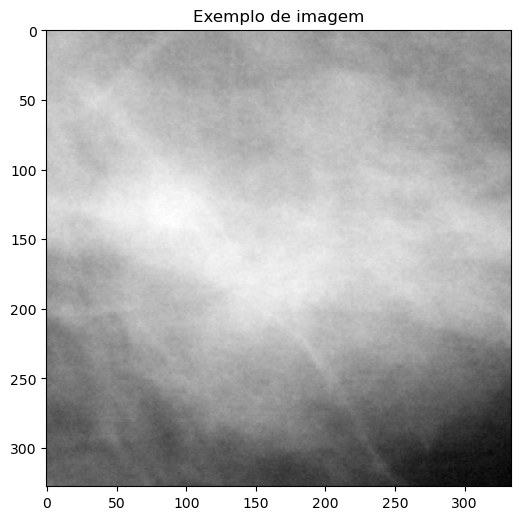

In [35]:
plt.figure(figsize=(6,6))
plt.title('Exemplo de imagem')
plt.imshow(imgs[0], cmap='gray')

> Agora precisamos fazer algumas manipulações e tratamento dos nossos dados.
> 
> Para isso, vamos precisar instalar a biblioteca TensorFlow e chamar o Keras para fazer um pré-processamento.
> 
> Para poder treinar esse modelo será necessário utilizar um aumento de dados. O aumento de dados será feito através do processamento das imagens originais, gerando novas imagens.
> 
> Além disso, as imagens utilizadas são redimensionadas para 256x256 para criar a entrada de dados do modelo. As técnicas escolhidas são: rotação, zoom e espelhamento.

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from tf_keras.preprocessing import image

In [38]:
def imageGenerator(path, image_folder, mask_folder, aug_dict, target_size=(256, 256), seed = 1, shuffle = True):
    # Número de imagens
    batch_size = 8
    # Apenas imagens cinza
    color_mode = 'grayscale'
    # Cria o gerador
    image_datagen = image.ImageDataGenerator(**aug_dict)
    mask_datagen = image.ImageDataGenerator(**aug_dict)
    # Gerador de imagens
    image_generator = image_datagen.flow_from_directory(
        path,
        classes=[image_folder],
        class_mode = None,
        color_mode = color_mode,
        target_size = target_size,
        batch_size = batch_size,
        seed = seed,
        shuffle = shuffle
    )
    mask_generator = mask_datagen.flow_from_directory(
        path,
        classes=[mask_folder],
        class_mode = None,
        color_mode = color_mode,
        target_size = target_size,
        batch_size = batch_size,
        seed = seed,
        shuffle = shuffle)
    # Geradores compactados para treinamento
    train_generator = zip(image_generator, mask_generator)
    
    return train_generator

In [39]:
# Argumentos
data_gen_args = dict(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
                     )

In [40]:
# Treinar o gerador
myGene = imageGenerator('data/train',
                        'image',
                        'label',
                        data_gen_args)

Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.


In [41]:
# Validar o gerador
myGeneVal = imageGenerator('data/test', 'image', 'label', dict(rescale=1./255), shuffle=False)

Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.


# Videoaula: Treinando uma rede convolucional

## Qual é a função da Camada de Pooling?

> O pooling simplifica a informação da camada anterior.
> 
> Uma unidade de área deve ser selecionada, como 2x2.
> 
> Esta unidade é utilizada no pooling em toda saída anterior.
> 
> Reforçando: esta unidade resume a informação da área passando em blocos de 2x2.
> 
> Portanto, para uma saída cuja matriz tenha o formato 24x24, a saída do seu pooling será 12x12, sendo uma unidade de 2x2.
> 
> O processo de sumarização deve ser escolhido como MaxPooling ou Pooling L2.
> 
> A sumarização reduz a quantidade de pesos a serem apreendidos e evita o overfitting.

## TensorFlow

> Criado em 2011 pela Google Brain, é uma evolução do DistBelief.
> 
> É um Framework para ML de código aberto.
> 
> Multiplataforma: Windows, MacOS ou Linux.
> 
> Conta com APIs criadas em Python, JavaScript, C++, Java, Go, Swift, C#, Haskell, Julia, Ruby, Rust e Scala.
> 
> Apresenta grande semelhança com a programação em Python, principalmente se for incorporado o pacote Numpy.